In [32]:
from tensorboard.backend.event_processing import event_accumulator      
import numpy as np
import pandas as pd
from glob import glob
import sys
import tensorboard.plugins.hparams as hparams
from tensorboard.plugins.hparams import plugin_data_pb2
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

interesting_keys = ['episode_reward_mean', 'episodes_total', 'custom_metrics/inv_mean', 'custom_metrics/accept_mean', "time_this_iter_s"]

def create_df(inpath):
    sg = {event_accumulator.COMPRESSED_HISTOGRAMS: 1,
          event_accumulator.IMAGES: 1,
          event_accumulator.AUDIO: 1,
          event_accumulator.SCALARS: 0,
          event_accumulator.HISTOGRAMS: 1}
    ea = event_accumulator.EventAccumulator(inpath, size_guidance=sg)
    ea.Reload()
    scalar_tags = ea.Tags()['scalars']
    print(scalar_tags)
    df = pd.DataFrame()
    for tag in interesting_keys:
        fultag = 'ray/tune/' + tag
        events = ea.Scalars(fultag)
        scalars = np.array([x.value for x in events])
        df.loc[:, tag] = scalars
    raw_data = ea.PluginTagToContent("hparams")
    plugin_data = plugin_data_pb2.HParamsPluginData.FromString(raw_data['_hparams_/session_start_info'])
    a = {key: val.number_value for key, val in plugin_data.session_start_info.hparams.items()}
    for key, val in a.items():
        df[key] = val
    return df


In [33]:
fuldfs = []
for path in tqdm.tqdm(glob('logs/gridsearchbad1020201109-172331/**/*tfevents*')):
    try:
        curdf = create_df(path)
    except Exception as e:
        print(type(e), e, sep=": ")
    else:
        print(curdf[[-1]])
        fuldfs.append(curdf.iloc[[-1]])

  3%|▎         | 1/35 [00:13<07:28, 13.21s/it]

['ray/tune/episode_reward_max', 'ray/tune/episode_reward_min', 'ray/tune/episode_reward_mean', 'ray/tune/episode_len_mean', 'ray/tune/episodes_this_iter', 'ray/tune/num_healthy_workers', 'ray/tune/timesteps_total', 'ray/tune/episodes_total', 'ray/tune/time_this_iter_s', 'ray/tune/time_since_restore', 'ray/tune/timesteps_since_restore', 'ray/tune/iterations_since_restore', 'ray/tune/policy_reward_min/choice00', 'ray/tune/policy_reward_min/inv00', 'ray/tune/policy_reward_max/choice00', 'ray/tune/policy_reward_max/inv00', 'ray/tune/policy_reward_mean/choice00', 'ray/tune/policy_reward_mean/inv00', 'ray/tune/custom_metrics/inv_mean', 'ray/tune/custom_metrics/inv_min', 'ray/tune/custom_metrics/inv_max', 'ray/tune/custom_metrics/accept_mean', 'ray/tune/custom_metrics/accept_min', 'ray/tune/custom_metrics/accept_max', 'ray/tune/sampler_perf/mean_env_wait_ms', 'ray/tune/sampler_perf/mean_raw_obs_processing_ms', 'ray/tune/sampler_perf/mean_inference_ms', 'ray/tune/sampler_perf/mean_action_proce

  3%|▎         | 1/35 [00:18<10:28, 18.48s/it]

['ray/tune/episode_reward_max', 'ray/tune/episode_reward_min', 'ray/tune/episode_reward_mean', 'ray/tune/episode_len_mean', 'ray/tune/episodes_this_iter', 'ray/tune/num_healthy_workers', 'ray/tune/timesteps_total', 'ray/tune/episodes_total', 'ray/tune/time_this_iter_s', 'ray/tune/time_since_restore', 'ray/tune/timesteps_since_restore', 'ray/tune/iterations_since_restore', 'ray/tune/policy_reward_min/choice00', 'ray/tune/policy_reward_min/inv00', 'ray/tune/policy_reward_max/choice00', 'ray/tune/policy_reward_max/inv00', 'ray/tune/policy_reward_mean/choice00', 'ray/tune/policy_reward_mean/inv00', 'ray/tune/custom_metrics/inv_mean', 'ray/tune/custom_metrics/inv_min', 'ray/tune/custom_metrics/inv_max', 'ray/tune/custom_metrics/accept_mean', 'ray/tune/custom_metrics/accept_min', 'ray/tune/custom_metrics/accept_max', 'ray/tune/sampler_perf/mean_env_wait_ms', 'ray/tune/sampler_perf/mean_raw_obs_processing_ms', 'ray/tune/sampler_perf/mean_inference_ms', 'ray/tune/sampler_perf/mean_action_proce

KeyError: "None of [Int64Index([-1], dtype='int64')] are in the [columns]"

In [3]:
alldf = pd.concat(fuldfs)

In [4]:
alldf.sort_values('episode_reward_mean')

,episode_reward_mean,episodes_total,horizon,lr,num_sgd_iter,train_batch_size,sgd_minibatch_size
384,-2.259036,40097.0,200.0,4.528661e-03,22.0,3904.0,848.0
51,-1.000000,460.0,2100.0,7.705330e-03,6.0,2032.0,898.0
114,0.711226,3201.0,2500.0,1.440665e-02,6.0,2066.0,620.0
282,6.550000,20006.0,2700.0,1.920507e-02,4.0,2094.0,631.0
0,16.535372,3.0,3500.0,2.908582e-02,11.0,1319.0,25.0
1533,18.522644,20003.0,1500.0,9.097759e-04,21.0,3190.0,135.0
1918,18.947123,20015.0,3000.0,5.563304e-04,9.0,3074.0,504.0
2,21.029026,6.0,3400.0,2.593297e-02,12.0,1314.0,31.0
2302,25.192434,40014.0,3000.0,2.937775e-04,7.0,3158.0,446.0
1278,25.635231,20003.0,4900.0,2.774217e-04,17.0,1097.0,256.0


In [5]:
import seaborn as sns

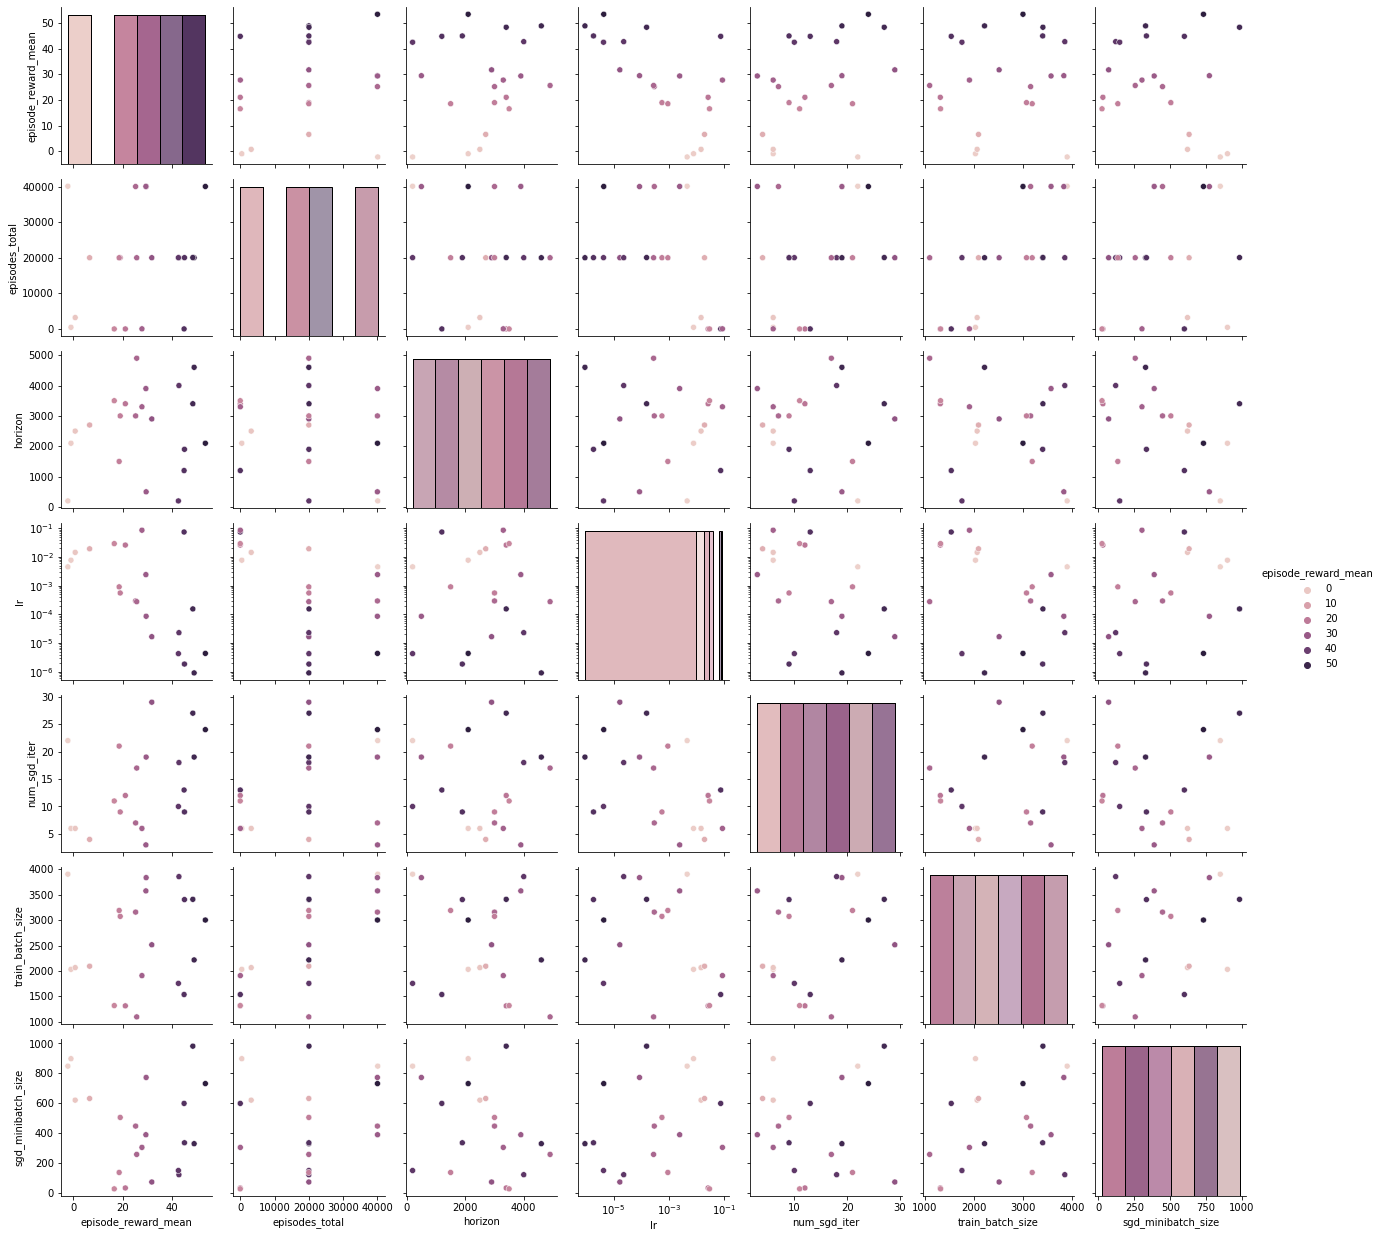

In [6]:
g = sns.PairGrid(alldf, hue="episode_reward_mean", y_vars=alldf.columns, x_vars=alldf.columns)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
lrindexx, = np.where(np.array(g.x_vars) == "lr")
lrindexy, = np.where(np.array(g.y_vars) == "lr")
for ax in g.axes[:, lrindexx]:
    ax[0].set_xscale("log")
for ax in g.axes[lrindexy, :]:
    ax[0].set_yscale("log")


In [10]:
fuldfs = []
i = 0
for path in tqdm.tqdm(glob('logs/gridsearchbad1020201109-172331/**/*tfevents*')):
    try:
        curdf = create_df(path)
        
        curdf['runid'] = i
    except Exception as e:
        print(type(e), e, sep=": ")
    else:
        fuldfs.append(curdf)
        i+=1

  3%|▎         | 1/35 [00:10<05:48, 10.26s/it]

<class 'ValueError'>: Length of values (146) does not match length of index (2255)


  9%|▊         | 3/35 [00:25<04:51,  9.12s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 11%|█▏        | 4/35 [00:39<05:32, 10.71s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 14%|█▍        | 5/35 [00:39<03:48,  7.61s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 17%|█▋        | 6/35 [00:40<02:38,  5.46s/it]

<class 'ValueError'>: Length of values (51) does not match length of index (50)


 20%|██        | 7/35 [00:54<03:46,  8.10s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 26%|██▌       | 9/35 [01:11<03:44,  8.63s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 51%|█████▏    | 18/35 [02:21<03:51, 13.59s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 54%|█████▍    | 19/35 [02:51<04:53, 18.34s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 57%|█████▋    | 20/35 [02:56<03:37, 14.52s/it]

<class 'ValueError'>: Length of values (1396) does not match length of index (1392)


 69%|██████▊   | 24/35 [03:34<01:54, 10.43s/it]

<class 'ValueError'>: Length of values (1366) does not match length of index (1365)


 77%|███████▋  | 27/35 [03:46<00:55,  6.89s/it]

<class 'KeyError'>: "Plugin 'hparams' could not be found."


 94%|█████████▍| 33/35 [04:11<00:08,  4.17s/it]

<class 'ValueError'>: Length of values (1031) does not match length of index (1030)


 97%|█████████▋| 34/35 [04:20<00:05,  5.72s/it]

<class 'ValueError'>: Length of values (1857) does not match length of index (1856)


100%|██████████| 35/35 [04:24<00:00,  7.55s/it]


In [11]:
dff = pd.concat(fuldfs)
sns.set()


In [24]:
dff['reward'] = dff['episode_reward_mean'] / 2

Text(0, 0.5, 'mean reward')

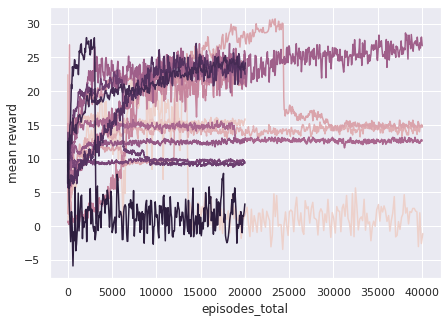

In [25]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=dff, x="episodes_total", y="reward", hue="runid", estimator=None, legend=None)
plt.ylabel("mean reward")

(0.0, 15.0)

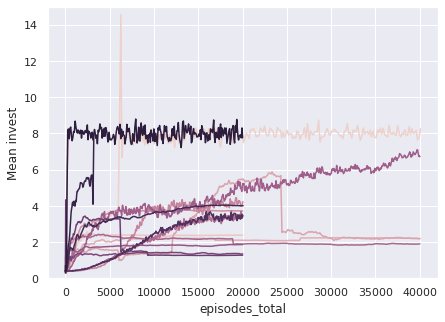

In [26]:
plt.figure(figsize=(7, 5))

sns.lineplot(data=dff, x="episodes_total", y="custom_metrics/inv_mean", hue="runid", estimator=None, legend=None)
plt.ylabel("Mean invest")
plt.ylim(0, 15)
    

(0.0, 15.0)

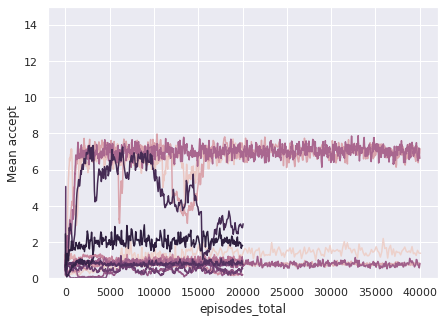

In [27]:
plt.figure(figsize=(7, 5))
sns.lineplot(data=dff, x="episodes_total", y="custom_metrics/accept_mean", hue="runid", estimator=None, legend=None)
plt.ylabel("Mean accept")
plt.ylim(0, 15)
